# 3.5 Exploring Numerical Instabilities:

In [4]:
import numpy as np
import numpy.linalg as la
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)
data_wo = data[data['w'] > -1] # data without outliers

hgt = data_wo['h'] # height without outliers
wgt = data_wo['w'] # weight without outliers
outliers = data[data['w'] == -1]

xmin = hgt.min()-15
xmax = hgt.max()+15
ymin = wgt.min()-15
ymax = wgt.max()+15


def plot_data_and_fit(h, w, x, y):
    plt.plot(h, w, 'ko', x, y, 'r-')
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
#     plt.show()

    
def trsf(x):
    return x / 100.


n = 10
x = np.linspace(xmin, xmax, 100)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


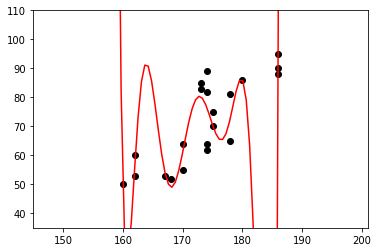

In [5]:
# method 1:
# regression using ployfit
c = poly.polyfit(hgt, wgt, n)
y = poly.polyval(x, c)
plot_data_and_fit(hgt, wgt, x, y)

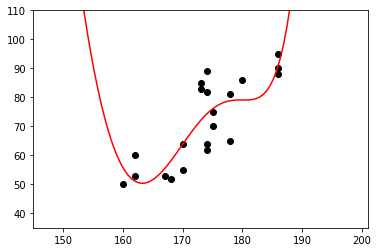

In [6]:
# method 2:
# regression using the Vandermonde matrix and pinv
X = poly.polyvander(hgt, n)
c = np.dot(la.pinv(X), wgt)
y = np.dot(poly.polyvander(x,n), c)
plot_data_and_fit(hgt, wgt, x, y)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


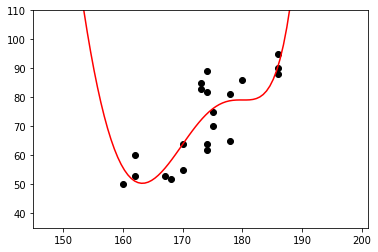

In [14]:
# method 3:
# regression using the Vandermonde matrix and lstsq
X = poly.polyvander(hgt, n)
c = la.lstsq(X, wgt)[0]
y = np.dot(poly.polyvander(x,n), c)
plot_data_and_fit(hgt, wgt, x, y)

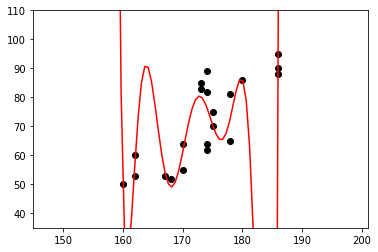

In [13]:
# method 4:
# regression on transformed data using the Vandermonde
# matrix and either pinv or lstsq
X = poly.polyvander(trsf(hgt), n)
c = np.dot(la.pinv(X), wgt)
y = np.dot(poly.polyvander(trsf(x),n), c)
plot_data_and_fit(hgt, wgt, x, y)